 # Setting the environment

In [1]:
import sys
sys.path.append('../config')  # Agregar la ruta a la carpeta config

# Importing libraries and modules

Se importaron librerías esenciales como pandas, matplotlib.pyplot, seaborn, sqlalchemy, entre otras. Estas herramientas permiten manipular datos, generar visualizaciones y conectar con bases de datos.

Essential libraries such as pandas, matplotlib.pyplot, seaborn, sqlalchemy, among others, were imported. These tools allow data manipulation, visualisations and connection to databases.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns  
from sqlalchemy import text
from sqlalchemy import Column, Integer, String
from sqlalchemy.orm import declarative_base 
import numpy as np
import textwrap

# Connection with PostgreSQL

Se estableció una conexión a una base de datos PostgreSQL utilizando sqlalchemy.create_engine(). Esto facilita la extracción de datos de manera eficiente y estructurada, garantizando que los datos sean obtenidos sin inconsistencias ni pérdidas de información.

A connection to a PostgreSQL database was established using sqlalchemy.create_engine(). This facilitates the extraction of data in an efficient and structured manner, ensuring that data is obtained without inconsistencies or loss of information.

In [6]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from config.conexion_db import conectar_db

conexion = conectar_db()

✅ Conexión exitosa con psycopg2


# Read data from PostgreSQL

Se ejecutó una consulta SQL para obtener información de la tabla candidates, cargando los datos en un DataFrame de pandas para su posterior análisis. Se validó que los datos extraídos correspondieran a los criterios establecidos y no presentaran duplicados.

A SQL query was executed to obtain information from the candidates table, loading the data into a pandas DataFrame for further analysis. It was validated that the extracted data corresponded to the established criteria and did not present duplicates.

In [7]:
df = pd.read_sql("SELECT * FROM accidentes LIMIT 5;", conexion)
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11316\639739079.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM accidentes LIMIT 5;", conexion)


,id,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,1,2023-07-29 13:00:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,2,2023-08-13 00:11:00,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,3,2021-12-09 10:30:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,4,2023-08-09 19:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,5,2023-08-19 14:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


Información básica del dataset

In [9]:
print("Información básica del dataset:")
print(df.info())

Información básica del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             5 non-null      int64         
 1   crash_date                     5 non-null      datetime64[ns]
 2   traffic_control_device         5 non-null      object        
 3   weather_condition              5 non-null      object        
 4   lighting_condition             5 non-null      object        
 5   first_crash_type               5 non-null      object        
 6   trafficway_type                5 non-null      object        
 7   alignment                      5 non-null      object        
 8   roadway_surface_cond           5 non-null      object        
 9   road_defect                    5 non-null      object        
 10  crash_type                     5 non-null      object     

most_severe_injury no es numérica
Si queremos hacer análisis de severidad, podemos convertir esta columna en una variable categórica ordenada.

In [10]:
df['most_severe_injury'] = pd.Categorical(df['most_severe_injury'],
                                          categories=['NO INDICATION OF INJURY', 'REPORTED, NOT EVIDENT',
                                                      'NON-INCAPACITATING INJURY', 'INCAPACITATING INJURY', 'FATAL'],
                                          ordered=True)

In [12]:
df['intersection_related'] = df['intersection_related'].apply(lambda x: 1 if x == 'Y' else 0)

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             5 non-null      int64         
 1   crash_date                     5 non-null      datetime64[ns]
 2   traffic_control_device         5 non-null      object        
 3   weather_condition              5 non-null      object        
 4   lighting_condition             5 non-null      object        
 5   first_crash_type               5 non-null      object        
 6   trafficway_type                5 non-null      object        
 7   alignment                      5 non-null      object        
 8   roadway_surface_cond           5 non-null      object        
 9   road_defect                    5 non-null      object        
 10  crash_type                     5 non-null      object        
 11  intersection_related   

Sacamos las Estadísticas descriptivas

In [14]:
print("\nEstadísticas descriptivas:")
print(df.describe(include='all').to_string())


Estadísticas descriptivas:
              id           crash_date traffic_control_device weather_condition lighting_condition first_crash_type trafficway_type           alignment roadway_surface_cond road_defect              crash_type  intersection_related         damage prim_contributory_cause  num_units       most_severe_injury  injuries_total  injuries_fatal  injuries_incapacitating  injuries_non_incapacitating  injuries_reported_not_evident  injuries_no_indication  crash_hour  crash_day_of_week  crash_month
count   5.000000                    5                      5                 5                  5                5               5                   5                    5           5                       5                   5.0              5                       5   5.000000                        4        5.000000             5.0                      5.0                     5.000000                            5.0                 5.00000    5.000000            5.00000     5

Revisamos si Hay Valores faltantes

In [15]:
print("\nValores faltantes por columna:")
print(df.isnull().sum().to_string())


Valores faltantes por columna:
id                               0
crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related             0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               1
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0


In [26]:
df["most_severe_injury"] = df["most_severe_injury"].str.strip()
print(df["most_severe_injury"].unique())

print(df["most_severe_injury"].dtype)

['NO INDICATION OF INJURY' nan]
object


In [22]:
print(df["most_severe_injury"].value_counts(dropna=False))

most_severe_injury
NO INDICATION OF INJURY      4
NaN                          1
REPORTED, NOT EVIDENT        0
NON-INCAPACITATING INJURY    0
INCAPACITATING INJURY        0
FATAL                        0
Name: count, dtype: int64


In [23]:
print(df[df["most_severe_injury"] == "NON-INCAPACITATING INJURY"])

Empty DataFrame
Columns: [id, crash_date, traffic_control_device, weather_condition, lighting_condition, first_crash_type, trafficway_type, alignment, roadway_surface_cond, road_defect, crash_type, intersection_related, damage, prim_contributory_cause, num_units, most_severe_injury, injuries_total, injuries_fatal, injuries_incapacitating, injuries_non_incapacitating, injuries_reported_not_evident, injuries_no_indication, crash_hour, crash_day_of_week, crash_month]
Index: []

[0 rows x 25 columns]


In [26]:
# Extraer año, mes, día y hora
df['crash_year'] = df['crash_date'].dt.year
df['crash_month'] = df['crash_date'].dt.month
df['crash_day'] = df['crash_date'].dt.day
df['crash_hour'] = df['crash_date'].dt.hour

# Data understanding

# Data columns' info

Se utilizó df.info() para revisar la estructura de los datos, identificando el número de registros, los tipos de datos de cada columna y la presencia de valores nulos. 

df.info() was used to review the data structure, identifying the number of records, the data types in each column, and the presence of null values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     209306 non-null  datetime64[ns]
 1   traffic_control_device         209306 non-null  object        
 2   weather_condition              209306 non-null  object        
 3   lighting_condition             209306 non-null  object        
 4   first_crash_type               209306 non-null  object        
 5   trafficway_type                209306 non-null  object        
 6   alignment                      209306 non-null  object        
 7   roadway_surface_cond           209306 non-null  object        
 8   road_defect                    209306 non-null  object        
 9   crash_type                     209306 non-null  object        
 10  intersection_related_i         209306 non-null  object        
 11  

Se realizó un análisis de valores únicos en variables clave utilizando df.nunique(). Este análisis permite identificar la diversidad dentro de cada columna y posibles valores redundantes. Se observó que algunas variables tienen una gran cantidad de valores únicos, lo que sugiere que podrían ser útiles en modelos predictivos o análisis categóricos más detallados.

# Resumen Estadístico

La función df.describe() permitió obtener un resumen estadístico de las variables numéricas, identificando tendencias generales, valores atípicos y dispersión de los datos. Se observó que algunas variables tienen una alta variabilidad, lo que sugiere la necesidad de un análisis más profundo para determinar su impacto en la selección de candidatos.

The df.describe() function provided a statistical summary of the numerical variables, identifying general trends, outliers and data dispersion. Some variables were found to have high variability, suggesting the need for further analysis to determine their impact on candidate selection.

In [27]:
df.describe()

,id,crash_date,intersection_related,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,5.000000,5,5.0,5.000000,5.000000,5.0,5.0,5.000000,5.0,5.00000,5.000000,5.00000,5.000000
mean,3.000000,2023-04-10 11:42:12,1.0,2.200000,1.000000,0.0,0.0,1.000000,0.0,2.20000,11.200000,4.80000,8.600000
min,1.000000,2021-12-09 10:30:00,1.0,2.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,1.00000,7.000000
25%,2.000000,2023-07-29 13:00:00,1.0,2.000000,0.000000,0.0,0.0,0.000000,0.0,2.00000,10.000000,4.00000,8.000000
50%,3.000000,2023-08-09 19:55:00,1.0,2.000000,0.000000,0.0,0.0,0.000000,0.0,3.00000,13.000000,5.00000,8.000000
75%,4.000000,2023-08-13 00:11:00,1.0,2.000000,0.000000,0.0,0.0,0.000000,0.0,3.00000,14.000000,7.00000,8.000000
max,5.000000,2023-08-19 14:55:00,1.0,3.000000,5.000000,0.0,0.0,5.000000,0.0,3.00000,19.000000,7.00000,12.000000
std,1.581139,NaN,0.0,0.447214,2.236068,0.0,0.0,2.236068,0.0,1.30384,7.049823,2.48998,1.949359


In [28]:
# Obtener estadísticas descriptivas de variables categóricas
stats_cat = df.describe(include=["object"])

stats_cat

,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,damage,prim_contributory_cause,most_severe_injury
count,5,5,5,5,5,5,5,5,5,5,5,4
unique,1,1,2,3,3,1,2,2,2,2,4,1
top,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY
freq,5,5,4,2,2,5,3,3,4,3,2,4


Grafica Distribución de variables categóricas

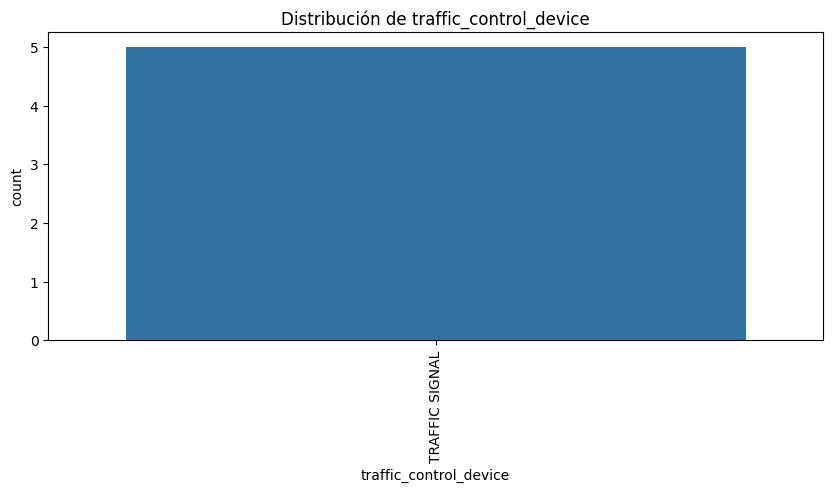

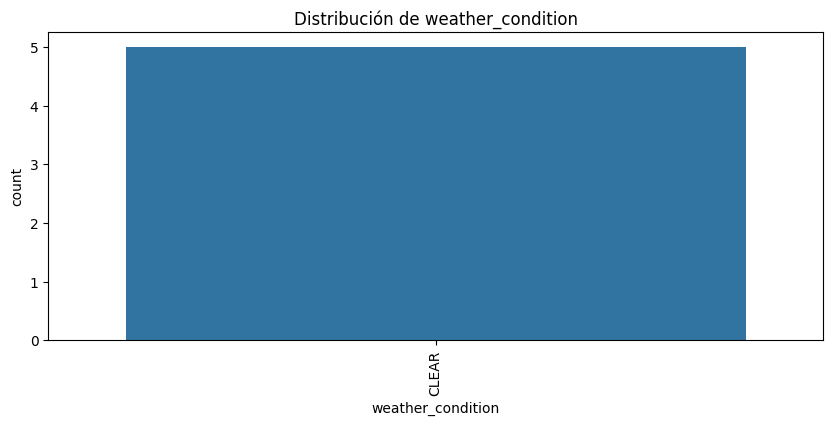

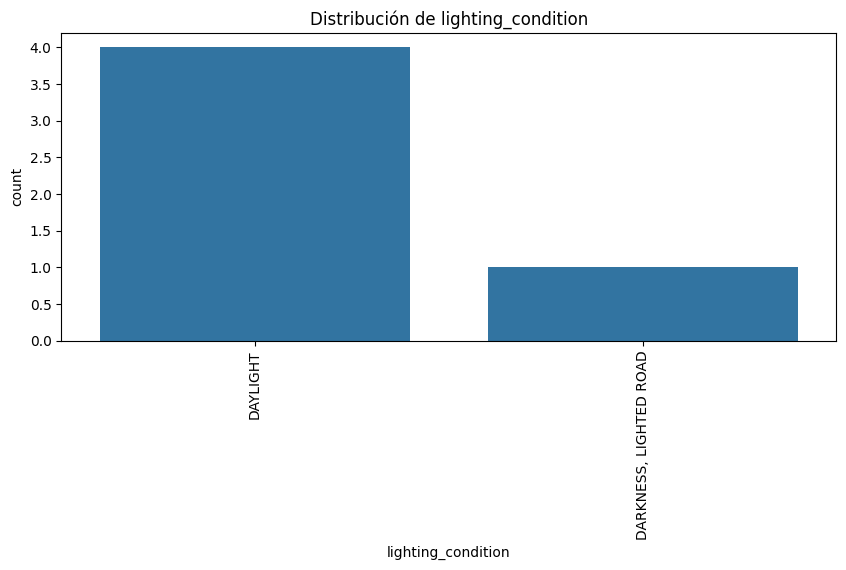

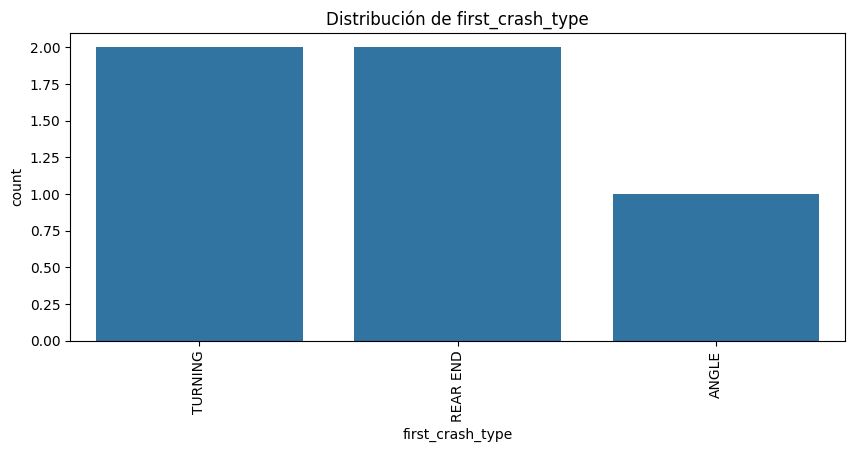

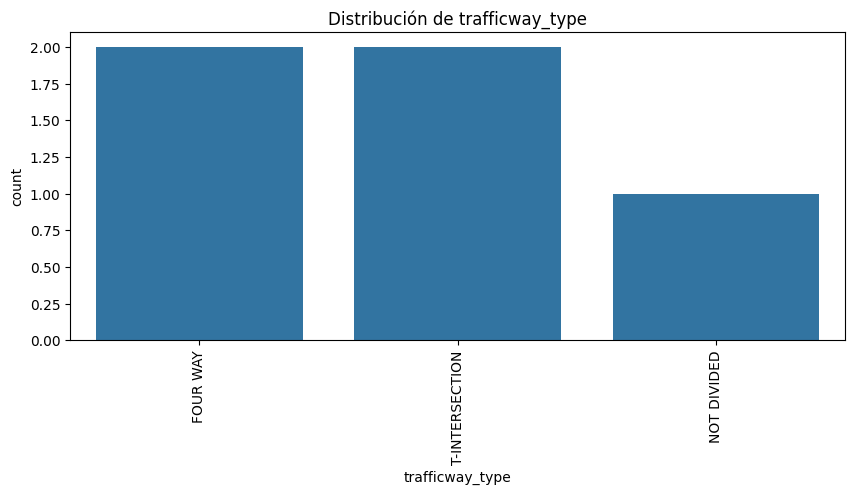

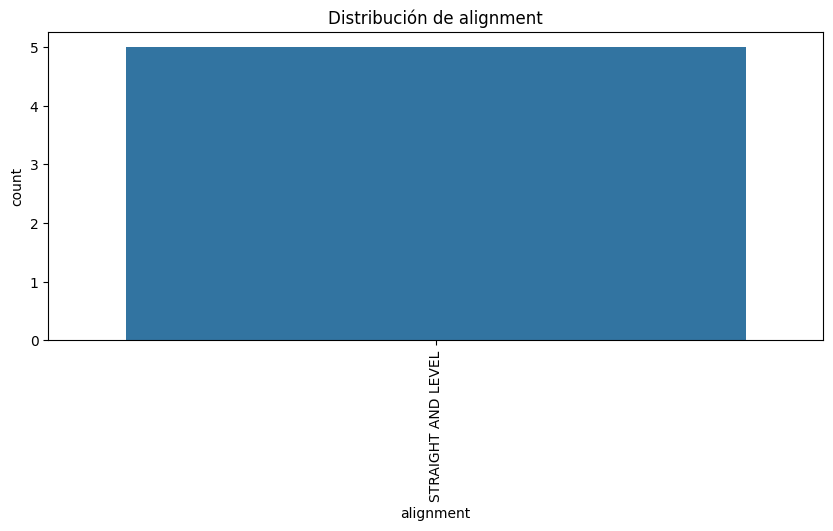

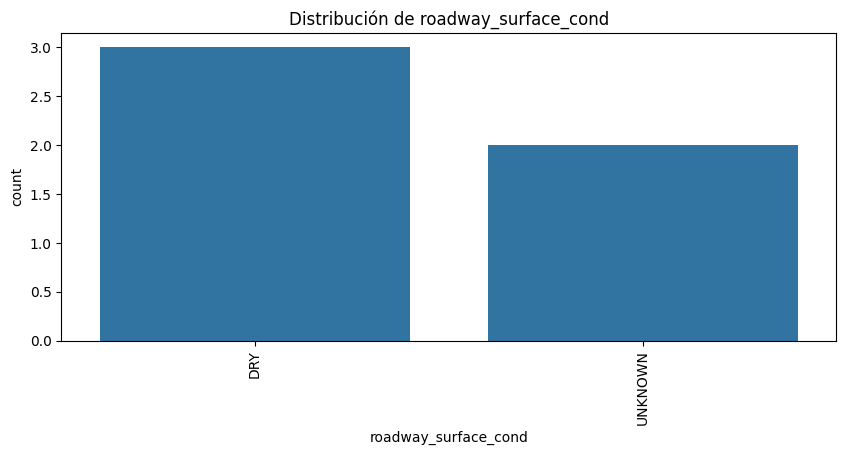

KeyboardInterrupt: 

In [30]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribución de {col}')
    plt.show()

Correlación entre variables numéricas


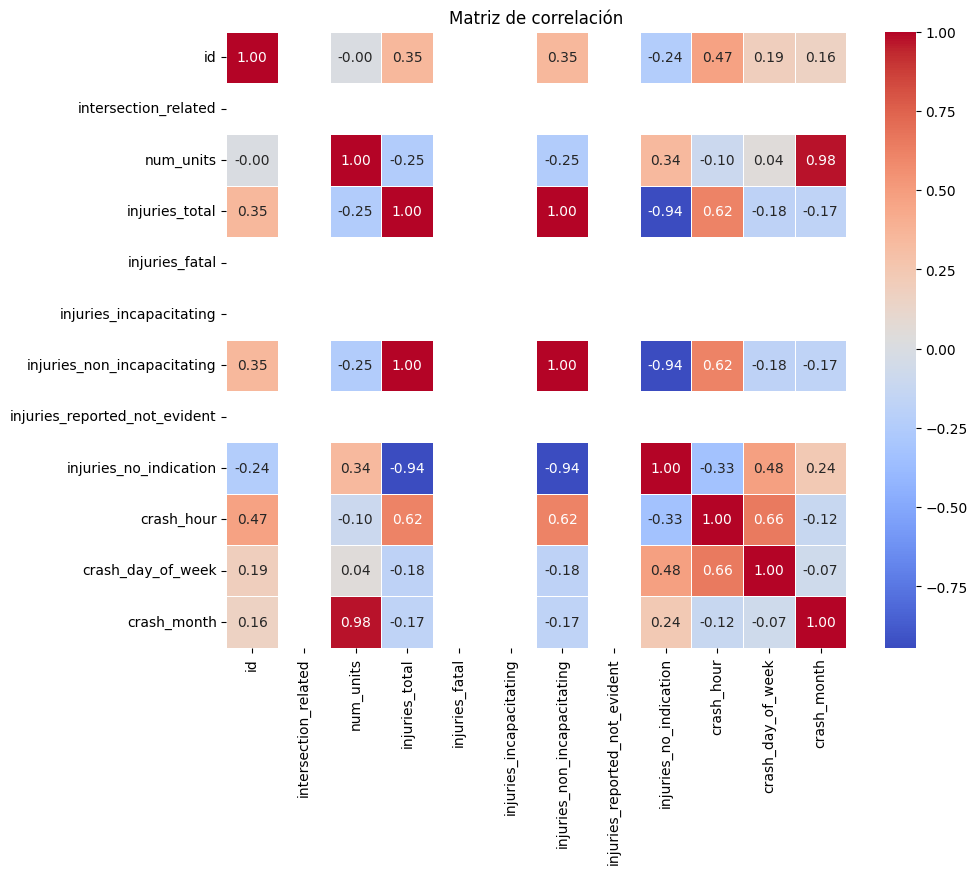

In [33]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Calcular la matriz de correlación
corr_matrix = df[numeric_columns].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()



Se analizó la distribución de tecnologías más comunes en los candidatos, destacando aquellas con mayor frecuencia. 


Distribución de la hora del accidente:


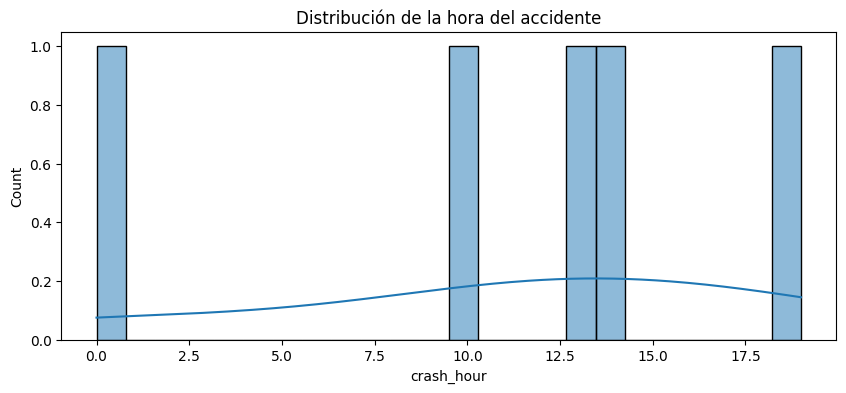

In [35]:
if 'crash_hour' in df.columns:
    print("\nDistribución de la hora del accidente:")
    plt.figure(figsize=(10, 4))
    sns.histplot(df['crash_hour'], bins=24, kde=True)
    plt.title('Distribución de la hora del accidente')
    plt.show()

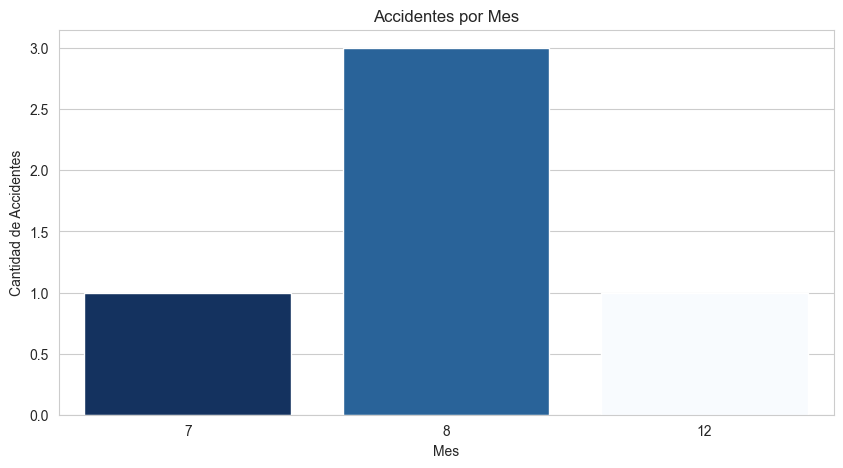

In [37]:

# Histograma de la cantidad de accidentes por mes
plt.figure(figsize=(10, 5))
sns.countplot(x="crash_month", data=df, hue="crash_month", palette="Blues_r", legend=False)
plt.xlabel("Mes")
plt.ylabel("Cantidad de Accidentes")
plt.title("Accidentes por Mes")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11316\3220762609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="weather_condition", order=df['weather_condition'].value_counts().index, palette="Oranges_r")


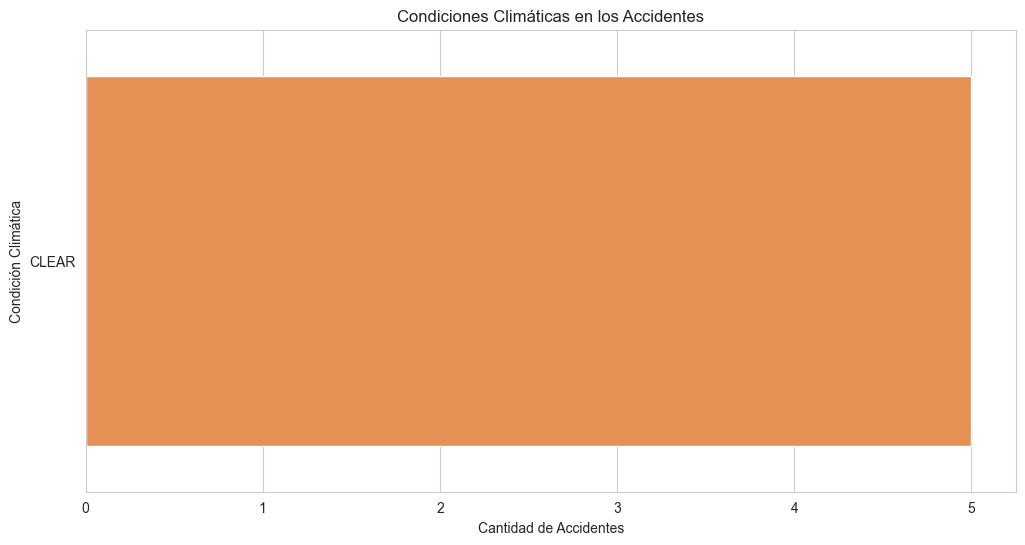

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="weather_condition", order=df['weather_condition'].value_counts().index, palette="Oranges_r")
plt.title("Condiciones Climáticas en los Accidentes")
plt.xlabel("Cantidad de Accidentes")
plt.ylabel("Condición Climática")
plt.show()




Se identificaron los países con mayor número de candidatos y se analizó su distribución. A través del gráfico de pastel, se visualizaron las proporciones relativas de cada país, mientras que el gráfico de barras permitió comparar las cantidades exactas. Este análisis ayuda a detectar posibles concentraciones de candidatos en ciertas regiones y a evaluar la diversidad del proceso de reclutamiento.

The countries with the highest number of candidates were identified and their distribution was analysed. The pie chart showed the relative proportions of each country, while the bar chart made it possible to compare the exact numbers. This analysis helps to detect possible concentrations of candidates in certain regions and to assess the diversity of the recruitment process.

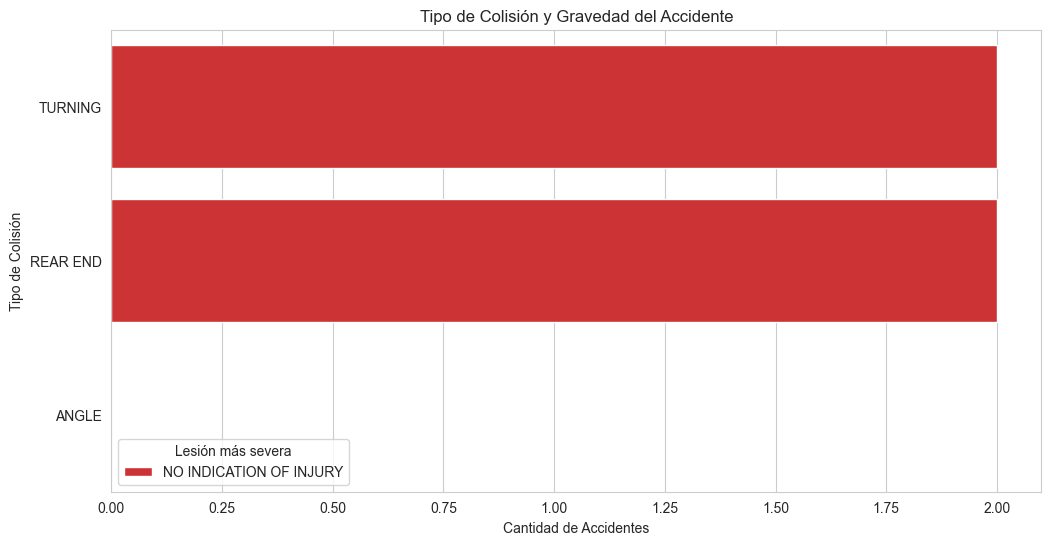

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="first_crash_type", hue="most_severe_injury", order=df['first_crash_type'].value_counts().index, palette="Set1")
plt.title("Tipo de Colisión y Gravedad del Accidente")
plt.xlabel("Cantidad de Accidentes")
plt.ylabel("Tipo de Colisión")
plt.legend(title="Lesión más severa")
plt.show()





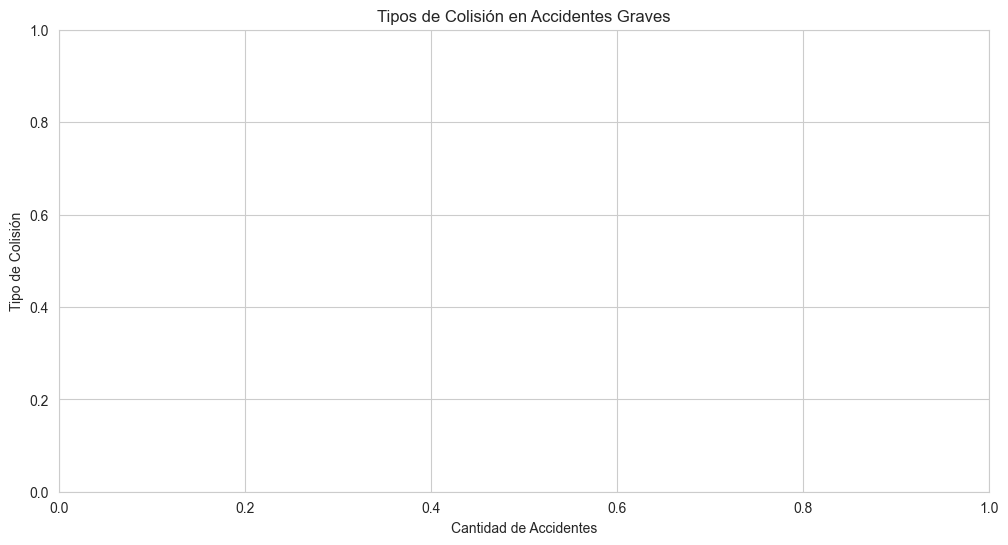

In [40]:
# Filtrar accidentes con más de 10 lesiones
high_injury_accidents = df[df["injuries_total"] > 10]

# Contar tipos de colisión en accidentes graves
collision_counts = high_injury_accidents["first_crash_type"].value_counts()

# Visualizar
plt.figure(figsize=(12, 6))
sns.barplot(x=collision_counts.values, y=collision_counts.index, palette="Reds_r")
plt.title("Tipos de Colisión en Accidentes Graves")
plt.xlabel("Cantidad de Accidentes")
plt.ylabel("Tipo de Colisión")
plt.show()




Relación entre 'weather_condition' y 'injuries_total':


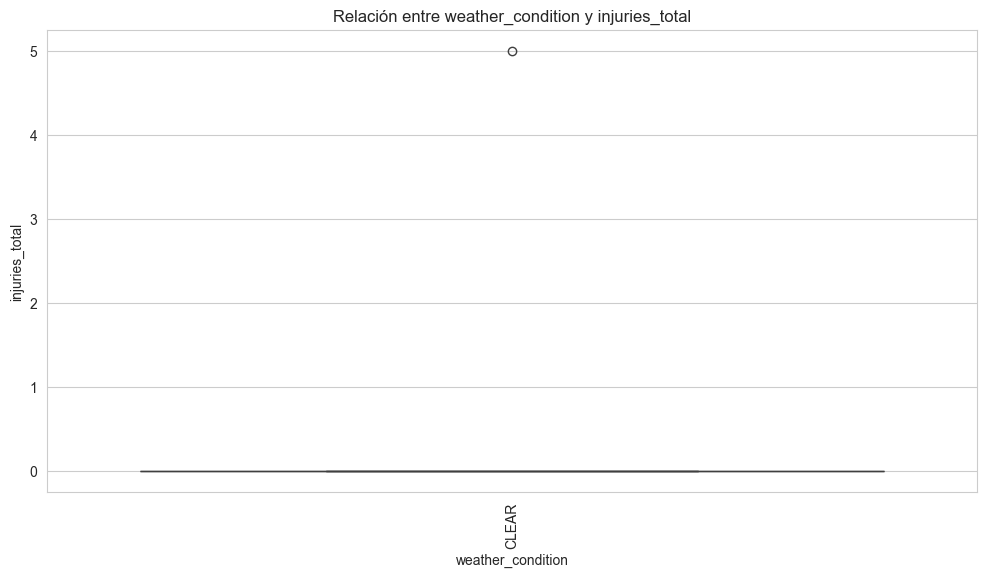

In [41]:
# 11. Análisis de la relación entre variables categóricas y numéricas
# Por ejemplo, relación entre 'weather_condition' y 'injuries_total'
if 'weather_condition' in df.columns and 'injuries_total' in df.columns:
    print("\nRelación entre 'weather_condition' y 'injuries_total':")
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='weather_condition', y='injuries_total')
    plt.xticks(rotation=90)
    plt.title('Relación entre weather_condition y injuries_total')
    plt.show()

# conclution 

Este análisis exploratorio proporciona una visión integral del proceso de selección, permitiendo detectar patrones y oportunidades de mejora. Con esta información, se pueden optimizar estrategias de contratación y mejorar la eficiencia en la evaluación de candidatos. 

This exploratory analysis provides a comprehensive view of the selection process, allowing patterns and opportunities for improvement to be detected. With this information, hiring strategies can be optimized and candidate evaluation efficiency can be improved.